In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
sns.set()
# sns.set(style="ticks")

# Tips Dataset

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


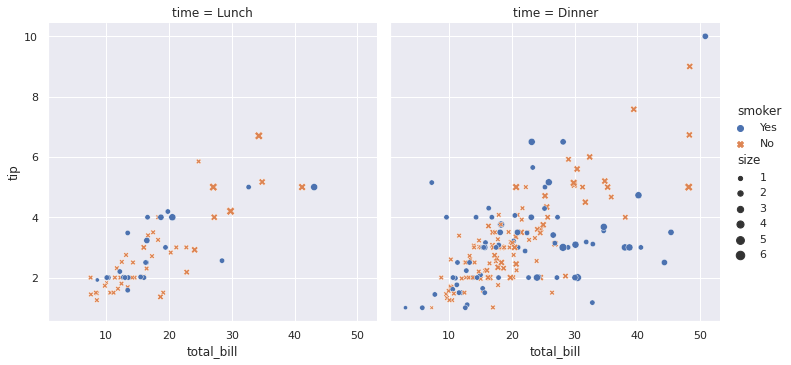

In [5]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

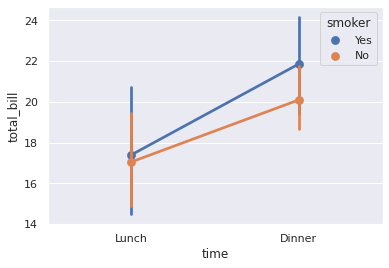

In [6]:
ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips)

# Facet Grid

Create a dataset of multiple random walks

In [7]:
nb_steps = 8
nb_plots = 9

In [8]:
df = pd.DataFrame()
for i in range(nb_plots):
    df_next = pd.DataFrame()
    df_next['id'] = [i]*nb_steps
    df_next['timestep'] = range(nb_steps)
    df_next['value1'] = np.random.randint(-1, 2, nb_steps).cumsum()
    df_next['value2'] = np.random.randint(-1, 2, nb_steps).cumsum()
    
    df = pd.concat([df, df_next])

In [9]:
df.set_index(['id', 'timestep']).head(20)

value1  value2
id timestep                
0  0             -1      -1
   1             -2      -1
   2             -2      -2
   3             -3      -2
   4             -2      -2
   5             -1      -2
   6              0      -2
   7             -1      -3
1  0              0       1
   1              0       1
   2              1       0
   3              1       1
   4              1       1
   5              0       1
   6             -1       1
   7             -1       2
2  0             -1      -1
   1              0       0
   2              1       0
   3              0       0

In [10]:
df['hue'] = np.nan
df.loc[df['id'].isin([0,1,2]), 'hue'] = 'blue'
df.loc[df['id'].isin([3,4,5]), 'hue'] = 'red'
df.loc[df['id'].isin([6,7,8]), 'hue'] = 'green'

In [11]:
# for id, d, in df.groupby('id'):
#     display(d)

Initialize a grid of plots with an Axes for each walk

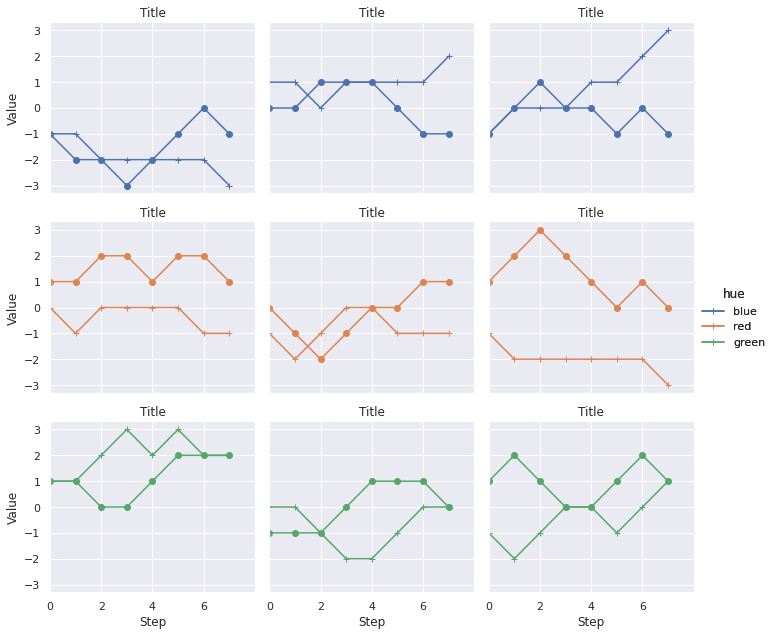

In [12]:
grid = sns.FacetGrid(df, 
                     hue='hue', # column used for colour encoding
#                      palette="tab20c",
                     col_wrap=3,
#                      legend_out=True,
#                      height=1.5,
#                      margin_titles=True, 
                     col='id')

# Draw a horizontal line to show the starting point
# grid.map(plt.axhline, 
#          y=0, 
#          ls=":", 
#          c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, 
         'timestep', 
         'value1',
         marker='o',
         label='value 1')

grid.map(plt.plot, 
         'timestep', 
         'value2', 
         marker='+',
         label='value 2').add_legend()

# grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')
grid.set_titles('Title')
grid.set_xlabels('Step')
grid.set_ylabels('Value')

# g = g.map_dataframe()

# Adjust the tick positions and labels
grid.set(xticks=np.arange(0, nb_steps, 2), 
#          yticks=[-3, 3],
         xlim=(0, nb_steps))
#          ylim=(-3.5, 3.5))

grid.add_legend()

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)

# Box Plot

In [13]:
df = pd.DataFrame(np.random.randn(10,4), columns=['Col1', 'Col2', 'Col3', 'Col4'])

In [14]:
df

,Col1,Col2,Col3,Col4
0,0.715173,-0.779807,1.561502,0.872961
1,0.223966,-0.301351,1.944631,1.180921
2,0.465593,-0.677764,-0.835523,-1.121677
3,-0.039420,0.645106,1.599866,-0.052448
4,-0.546433,1.067039,-0.446098,-0.520915
5,-0.912518,-0.085717,1.312064,2.000898
6,-0.948627,1.002573,-0.893057,-0.907015
7,-0.817448,-1.297021,0.156869,0.735997
8,-0.938521,0.521611,-1.226592,0.041288
9,-0.778247,-0.626522,2.162365,-0.129593


In [15]:
df.describe()

,Col1,Col2,Col3,Col4
count,10.000000,10.000000,10.000000,10.000000
mean,-0.357648,-0.053185,0.533603,0.210042
std,0.640028,0.819491,1.314587,0.979466
min,-0.948627,-1.297021,-1.226592,-1.121677
25%,-0.888750,-0.664953,-0.738167,-0.423085
50%,-0.662340,-0.193534,0.734466,-0.005580
75%,0.158120,0.614232,1.590275,0.838720
max,0.715173,1.067039,2.162365,2.000898


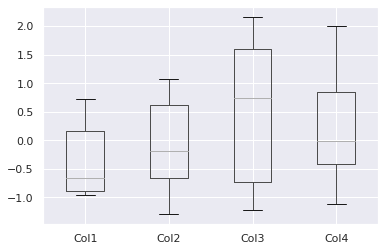

In [16]:
boxplot = df.boxplot() #column=['Col1', 'Col2', 'Col3']

In [17]:
N = 150
values = np.random.random(size=N)
groups = np.random.choice(['A','B','C'], size=N)
df = pd.DataFrame({'value':values, 'group':groups})

In [18]:
df

,value,group
0,0.182135,C
1,0.544477,A
2,0.406329,A
3,0.832966,A
4,0.839741,B
...,...,...
145,0.876146,B
146,0.265122,C
147,0.619764,C
148,0.573204,A


In [19]:
df.groupby('group', as_index=False).mean()

,group,value
0,A,0.520310
1,B,0.555259
2,C,0.495706


<AxesSubplot:title={'center':'value'}, xlabel='group', ylabel='value'>

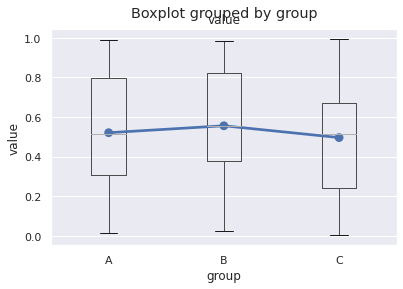

In [20]:
ax = df.boxplot(column='value', by='group', showfliers=True, 
                positions=range(df.group.unique().shape[0]))
sns.pointplot(x='group', y='value', data=df.groupby('group', as_index=False).mean(), ax=ax)

# Bar Plot

In [21]:
df_ = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                    index=['Mercury', 'Venus', 'Earth'])
# df_ = df_.reset_index()

In [22]:
df_

,mass,radius
Mercury,0.33,2439.7
Venus,4.87,6051.8
Earth,5.97,6378.1


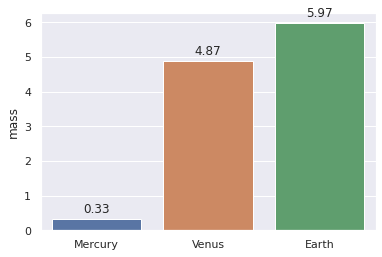

In [23]:
ax = sns.barplot(x=df_.index, y='mass', data=df_)#, hue=df_.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [24]:
df = pd.DataFrame()
# df['tSBP'] = 

In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


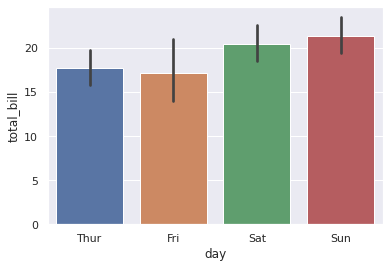

In [26]:
ax = sns.barplot(x="day", y="total_bill", data=tips[['day', 'total_bill']])

In [27]:
sns.set_context('paper')
df_ = sns.load_dataset('titanic')

In [28]:
df_

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

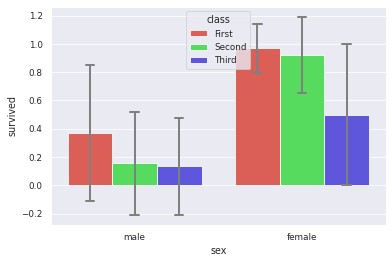

In [29]:
sns.barplot(x = 'sex', 
            y = 'survived', 
            hue = 'class', 
            data = df_,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', 
            errwidth = 2,  
            ci = 'sd')

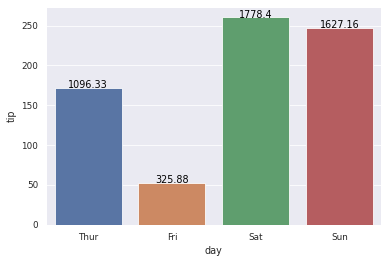

In [30]:
df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

ax=sns.barplot(x='day',y='tip',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    ax.text(row.name, row.tip, round(row.total_bill,2), color='black', ha="center")

In [31]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


grouped stacked bar plot

In [32]:
df1=pd.DataFrame(np.random.rand(4,2),index=["A","B","C","D"],columns=["I","J"])
df1["Name"] = "df1"
df2=pd.DataFrame(np.random.rand(4,2),index=["A","B","C","D"],columns=["I","J"])
df2["Name"] = "df2"
df3=pd.DataFrame(np.random.rand(4,2),index=["A","B","C","D"],columns=["I","J"])
df3["Name"] = "df3"

In [33]:
df1

,I,J,Name
A,0.463784,0.657782,df1
B,0.711066,0.217277,df1
C,0.257905,0.984840,df1
D,0.715661,0.373021,df1


In [34]:
df2

,I,J,Name
A,0.639395,0.422311,df2
B,0.655895,0.105576,df2
C,0.401478,0.047647,df2
D,0.839696,0.951320,df2


In [35]:
df = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "index"]) # transform in tidy format each df
                   for i in [df1, df2, df3]],
                   ignore_index=True)

df = df.set_index(["Name", "index", "variable"])
df["vcs"] = df.groupby(level=["Name", "index"]).cumsum()
df = df.reset_index() 

In [36]:
df

,Name,index,variable,value,vcs
0,df1,A,I,4.637837e-01,4.637837e-01
1,df1,B,I,7.110661e-01,7.110661e-01
2,df1,C,I,2.579054e-01,2.579054e-01
3,df1,D,I,7.156607e-01,7.156607e-01
4,df1,A,J,6.577816e-01,1.121565e+00
5,df1,B,J,2.172769e-01,9.283429e-01
6,df1,C,J,9.848396e-01,1.242745e+00
7,df1,D,J,3.730208e-01,1.088681e+00
8,df2,A,I,6.393952e-01,6.393952e-01
9,df2,B,I,6.558950e-01,6.558950e-01


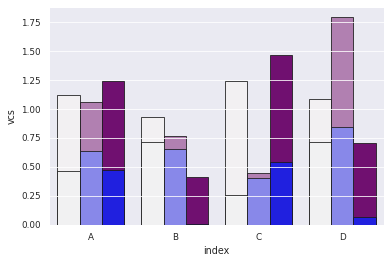

In [37]:
c = ["blue", "purple", "red", "green", "pink"]
for i, g in enumerate(df.groupby("variable")):
    ax = sns.barplot(data=g[1],
                     x="index",
                     y="vcs",
                     hue="Name",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
ax.legend_.remove() # remove the redundant legends 

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.1f} %'.format(height*100), 
#             horizontalalignment='center', 
#             verticalalignment='center')

https://randyzwitch.com/creating-stacked-bar-chart-seaborn/

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [39]:
#Read in data & create total column
df = pd.read_csv("stacked_bar.csv")
df["total"] = df['Series1'] + df['Series2']

In [40]:
df.head()

,Group,Series1,Series2,total
0,1,3.324129,8.733030,12.057159
1,2,3.109299,5.621415,8.730714
2,3,3.603704,4.830770,8.434474
3,4,5.030114,4.846976,9.877090
4,5,6.555816,4.126257,10.682073


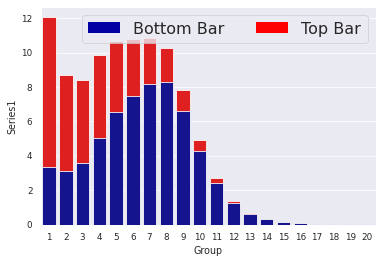

In [41]:
sns.barplot(x=df['Group'], y=df['total'], color="red") #Plot 1 - background - "total" (top) series
bottom_plot = sns.barplot(x=df['Group'], y=df['Series1'], color = "#0000A3") #Plot 2 - overlay - "bottom" series

# Legend
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
# l.draw_frame(False)

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


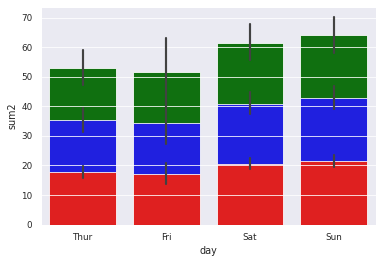

In [43]:
tips = sns.load_dataset("tips")
tips['sum'] = tips['total_bill'] + tips['total_bill']
tips['sum2'] = tips['sum'] + tips['total_bill']

ax = sns.barplot(x="day", 
                 y="total_bill", 
                 data=tips, 
                 zorder = 0, 
                 color = "red")
ax = sns.barplot(ax=ax, 
                 x="day", 
                 y="sum", 
                 data=tips, 
                 zorder = -1, 
                 color = "blue")
ax = sns.barplot(ax=ax, 
                 x="day", 
                 y="sum2", 
                 data=tips, 
                 zorder = -2, 
                 color = "green")

# MatplotLib BarPlot

In [44]:
df = pd.DataFrame(columns=["App","Feature1", "Feature2","Feature3",
                           "Feature4","Feature5",
                           "Feature6","Feature7","Feature8"], 
                  data=[["SHA",0,0,1,1,1,0,1,0],
                        ["LHA",1,0,1,1,0,1,1,0],
                        ["DRA",0,0,0,0,0,0,1,0],
                        ["FRA",1,0,1,1,1,0,1,1],
                        ["BRU",0,0,1,0,1,0,0,0],
                        ["PAR",0,1,1,1,1,0,1,0],
                        ["AER",0,0,1,1,0,1,1,0],
                        ["SHE",0,0,0,1,0,0,1,0]])
df = df.set_index('App').T

In [45]:
df

App,SHA,LHA,DRA,FRA,BRU,PAR,AER,SHE
Feature1,0,1,0,1,0,0,0,0
Feature2,0,0,0,0,0,1,0,0
Feature3,1,1,0,1,1,1,1,0
Feature4,1,1,0,1,0,1,1,1
Feature5,1,0,0,1,1,1,0,0
Feature6,0,1,0,0,0,0,1,0
Feature7,1,1,1,1,0,1,1,1
Feature8,0,0,0,1,0,0,0,0


<AxesSubplot:>

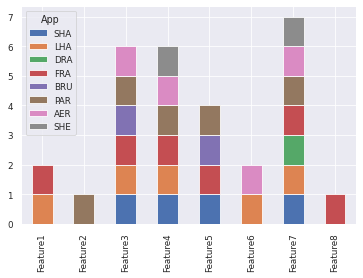

In [46]:
df.plot(kind='bar', stacked=True)

In [47]:
df = pd.DataFrame({'val1': [.5, .2, .1],
                   'val2': [.2, .4, .8],
                   'val3': [.3, .4, .1]},
                    index=['exp1', 'exp2', 'exp3'])
# df = pd.DataFrame()
# df['exp1'] = [.5, .2, .3]
# df['exp2'] = [.2, .4, .4]
# df['exp3'] = [.1, .8, .1]

In [48]:
df

,val1,val2,val3
exp1,0.5,0.2,0.3
exp2,0.2,0.4,0.4
exp3,0.1,0.8,0.1


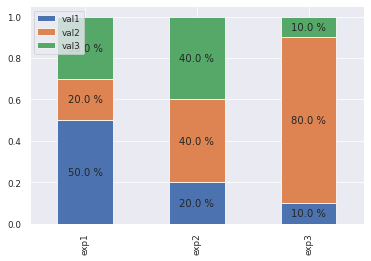

In [49]:
ax = df.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center')

<AxesSubplot:>

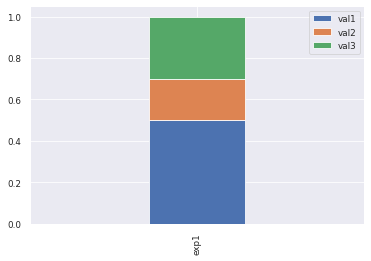

In [50]:
df.iloc[0].to_frame().T.plot(kind='bar', stacked=True , width=.2)

In [51]:
df = pd.DataFrame()
df['male'] = np.random.randint(5, size=10)
df['female'] = np.random.randint(5, size=10)

In [52]:
desc = df.describe().loc[['mean', 'std']]

In [53]:
desc

,male,female
mean,1.70000,1.90000
std,1.05935,1.37032


In [54]:
# TODO
if False:
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, df['male'], width, yerr=desc.loc['mean', 'male'])
    p2 = plt.bar(ind, df['female'], width,
                 bottom=df['male'], yerr=desc.loc['mean', 'female'])

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

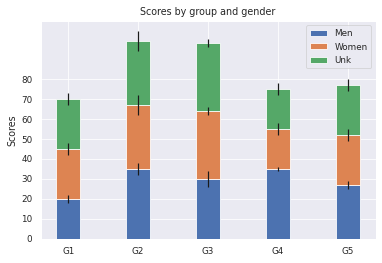

In [55]:
# https://matplotlib.org/2.2.5/gallery/lines_bars_and_markers/bar_stacked.html

N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)
p3 = plt.bar(ind, womenMeans, width,
             bottom=[x + y for x, y in zip(menMeans, womenMeans)], yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Men', 'Women', 'Unk'))

plt.show()

# LinePlot

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

In [57]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990


<AxesSubplot:>

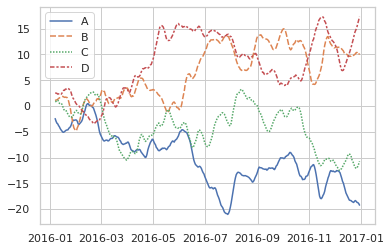

In [58]:
sns.lineplot(data=data)

# Pointplot

In [59]:
d = { 0:'zero', 1:'one' }

In [60]:
df1 = pd.DataFrame({"total_bill": [0, 1, 2, 3], "tip": [1, 1, 3, 3], 'hue':0 })#, 'name':'one' })
df2 = pd.DataFrame({"total_bill": [5, 4, 3, 2], "tip": [1, 1, 3, 3], 'hue':1 })#, 'name':'two' })

In [61]:
df = pd.concat([df1, df2], axis='index')

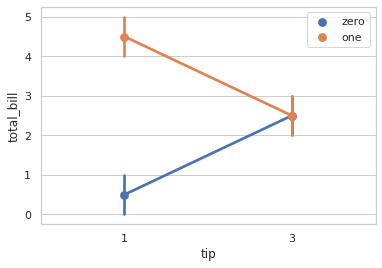

In [62]:
ax = sns.pointplot(x="tip", 
                   y="total_bill", 
                   hue='hue', 
                   data=df)

legend = ax.legend()
for text_obj in legend.get_texts():
    text = text_obj.get_text()
    text_obj.set_text(d[int(text)])